In [ ]:
import numpy as np
import pandas as pd

from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import json


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'PATH/thesis_exp_tables.csv');

In [ ]:
normalizer_mask=(data["Normalizer"]=='normal') & (data["selectionMethod"]=="rfe_DecisionTree")

In [ ]:
df10=data.loc[(data["featureNumber"]==10) & normalizer_mask,:].groupby(by=['modelName']).agg(
    AUC=("test_roc_auc","mean"),
    F1=("test_f1","mean"),
    PRECISION=("test_precision","mean"),
    RECALL=("test_recall","mean"),
    ACCURACY=("test_accuracy","mean"),
).reset_index()


df10[['AUC',"F1","PRECISION","RECALL","ACCURACY"]]=df10[['AUC',"F1","PRECISION","RECALL","ACCURACY"]].apply(lambda x: round(x*100, 2))


df10.head()

,modelName,AUC,F1,PRECISION,RECALL,ACCURACY
0,ab,99.63,97.59,98.18,97.01,98.01
1,bc_100,99.65,98.24,98.51,97.96,98.54
2,dt,97.55,97.13,97.07,97.20,97.61
3,et_100,99.71,98.35,98.77,97.94,98.64
4,et_500,99.75,98.36,98.73,97.99,98.64


In [ ]:
df15=data.loc[(data["featureNumber"]==15) & normalizer_mask,:].groupby(by=['modelName']).agg(
    AUC=("test_roc_auc","mean"),
    F1=("test_f1","mean"),
    PRECISION=("test_precision","mean"),
    RECALL=("test_recall","mean"),
    ACCURACY=("test_accuracy","mean"),
).reset_index()


df15[['AUC',"F1","PRECISION","RECALL","ACCURACY"]]=df15[['AUC',"F1","PRECISION","RECALL","ACCURACY"]].apply(lambda x: round(x*100, 2))


df15.head()

,modelName,AUC,F1,PRECISION,RECALL,ACCURACY
0,ab,99.66,97.56,97.96,97.16,97.98
1,bc_100,99.68,98.32,98.57,98.08,98.61
2,dt,97.63,97.22,97.13,97.31,97.69
3,et_100,99.76,98.36,98.66,98.05,98.64
4,et_500,99.79,98.38,98.67,98.08,98.65


In [ ]:
df20=data.loc[(data["featureNumber"]==20) & normalizer_mask,:].groupby(by=['modelName']).agg(
    AUC=("test_roc_auc","mean"),
    F1=("test_f1","mean"),
    PRECISION=("test_precision","mean"),
    RECALL=("test_recall","mean"),
    ACCURACY=("test_accuracy","mean"),
).reset_index()


df20[['AUC',"F1","PRECISION","RECALL","ACCURACY"]]=df20[['AUC',"F1","PRECISION","RECALL","ACCURACY"]].apply(lambda x: round(x*100, 2))


df20.head()

,modelName,AUC,F1,PRECISION,RECALL,ACCURACY
0,ab,99.68,97.58,98.00,97.17,98.00
1,bc_100,99.67,98.30,98.55,98.04,98.59
2,dt,97.55,97.15,97.21,97.09,97.63
3,et_100,99.77,98.38,98.64,98.13,98.66
4,et_500,99.79,98.38,98.62,98.14,98.65


In [ ]:
df25=data.loc[(data["featureNumber"]==25) & normalizer_mask,:].groupby(by=['modelName']).agg(
    AUC=("test_roc_auc","mean"),
    F1=("test_f1","mean"),
    PRECISION=("test_precision","mean"),
    RECALL=("test_recall","mean"),
    ACCURACY=("test_accuracy","mean"),
).reset_index()


df25[['AUC',"F1","PRECISION","RECALL","ACCURACY"]]=df25[['AUC',"F1","PRECISION","RECALL","ACCURACY"]].apply(lambda x: round(x*100, 2))


df25.head()

,modelName,AUC,F1,PRECISION,RECALL,ACCURACY
0,ab,99.67,97.59,97.96,97.22,98.00
1,bc_100,99.67,98.30,98.54,98.07,98.59
2,dt,97.57,97.16,97.14,97.18,97.64
3,et_100,99.76,98.32,98.56,98.08,98.61
4,et_500,99.77,98.32,98.55,98.10,98.61


In [ ]:
df10.columns=["model","AUC_10","F1_10","PRECISION_10","RECALL_10","ACCURACY_10"]
df15.columns=["model","AUC_15","F1_15","PRECISION_15","RECALL_15","ACCURACY_15"]
df20.columns=["model","AUC_20","F1_20","PRECISION_20","RECALL_20","ACCURACY_20"]
df25.columns=["model","AUC_25","F1_25","PRECISION_25","RECALL_25","ACCURACY_25"]

data_frames = [df10,df15,df20,df25]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['model'],how='outer'), data_frames)

df_merged.reset_index(inplace=True)

df_merged.head(15)

,index,model,AUC_10,F1_10,PRECISION_10,RECALL_10,ACCURACY_10,AUC_15,F1_15,PRECISION_15,...,AUC_20,F1_20,PRECISION_20,RECALL_20,ACCURACY_20,AUC_25,F1_25,PRECISION_25,RECALL_25,ACCURACY_25
0,0,ab,99.63,97.59,98.18,97.01,98.01,99.66,97.56,97.96,...,99.68,97.58,98.00,97.17,98.00,99.67,97.59,97.96,97.22,98.00
1,1,bc_100,99.65,98.24,98.51,97.96,98.54,99.68,98.32,98.57,...,99.67,98.30,98.55,98.04,98.59,99.67,98.30,98.54,98.07,98.59
2,2,dt,97.55,97.13,97.07,97.20,97.61,97.63,97.22,97.13,...,97.55,97.15,97.21,97.09,97.63,97.57,97.16,97.14,97.18,97.64
3,3,et_100,99.71,98.35,98.77,97.94,98.64,99.76,98.36,98.66,...,99.77,98.38,98.64,98.13,98.66,99.76,98.32,98.56,98.08,98.61
4,4,et_500,99.75,98.36,98.73,97.99,98.64,99.79,98.38,98.67,...,99.79,98.38,98.62,98.14,98.65,99.77,98.32,98.55,98.10,98.61
5,5,gn,97.79,86.35,95.18,79.03,89.62,98.40,90.18,96.65,...,98.08,91.26,96.28,86.74,93.09,97.59,90.72,95.05,86.77,92.62
6,6,knn3,98.93,97.95,98.80,97.12,98.31,98.71,97.31,98.70,...,98.26,95.94,98.39,93.61,96.71,96.81,92.80,97.10,88.87,94.27
7,7,knn5,99.11,98.02,98.91,97.15,98.37,99.02,97.16,98.77,...,98.70,95.81,98.51,93.26,96.61,97.54,92.30,97.12,87.94,93.90
8,8,lr,94.68,89.60,93.77,85.79,91.72,96.25,91.09,94.34,...,96.88,91.56,94.26,89.02,93.18,97.03,91.71,94.27,89.28,93.29
9,9,rf_100,99.70,98.32,98.57,98.07,98.61,99.74,98.37,98.55,...,99.75,98.39,98.56,98.23,98.67,99.74,98.38,98.54,98.22,98.65


#Selection Method

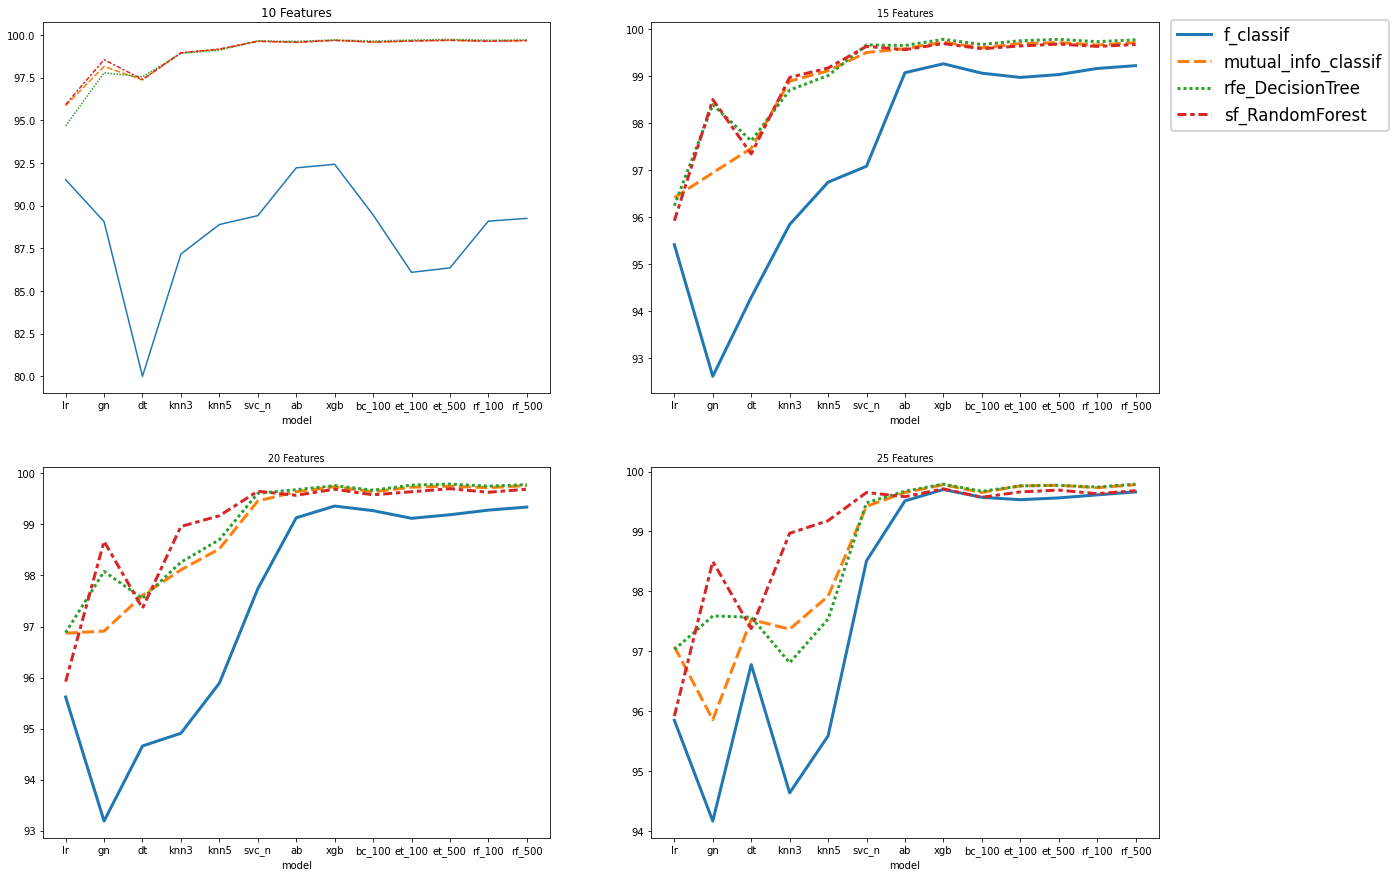

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,15))

for index,selection_type in enumerate([10,15,20,25]):

  row_index=int(index/2)
  if index%2==0:
    column_index=0
  else:
    column_index=1

  df_fc=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df_fc.set_index('model',inplace=True)

  df_fc=df_fc.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df_fc.rename(columns={
      'fc{}'.format(selection_type):'f_classif',
      'in{}'.format(selection_type):'mutual_info_classif',
      'dt{}'.format(selection_type):'rfe_DecisionTree',
      'rf{}'.format(selection_type):'sf_RandomForest',
  }, inplace=True)

  df_fc = df_fc[['f_classif', 'mutual_info_classif', 'rfe_DecisionTree', 'sf_RandomForest']]
  

  ax=sns.lineplot(
      data=df_fc,
      markers=False, 
      dashes=True,
      ax=axs[row_index][column_index]
  )
  if row_index!=0 or column_index!=1:
    ax.get_legend().remove()
  else:
    ax.legend(loc="upper right", bbox_to_anchor=(1.47, 1.03),fontsize='xx-large')

  ax.set_title("{} Features".format(selection_type))
  ax.set_xticks(range(len(df_fc)))
  ax.set_xticklabels(df_fc.index)
  sns.set_context("poster",font_scale=0.4)


plt.show()

In [ ]:
df10=data.loc[(data["featureNumber"]==25) & (data["Normalizer"]=='normal'),:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
# df10.reset_index(inplace=True)
# df10.columns=["model","fc10","in10","dt10","rf10","xgb10"]
df10.head(13)

selectionMethod,f_classif,mutual_info_classif,rfe_DecisionTree,sf_RandomForest,sf_XGBClassifier
modelName,,,,,
ab,99.51,99.65,99.67,99.58,99.55
bc_100,99.57,99.65,99.67,99.57,99.46
dt,96.78,97.53,97.57,97.38,97.04
et_100,99.53,99.76,99.76,99.66,99.52
et_500,99.56,99.77,99.77,99.69,99.55
gn,94.17,95.86,97.59,98.50,98.55
knn3,94.64,97.37,96.81,98.97,98.78
knn5,95.59,97.92,97.54,99.18,99.05
lr,95.85,97.08,97.03,95.92,93.86


#Selection Number

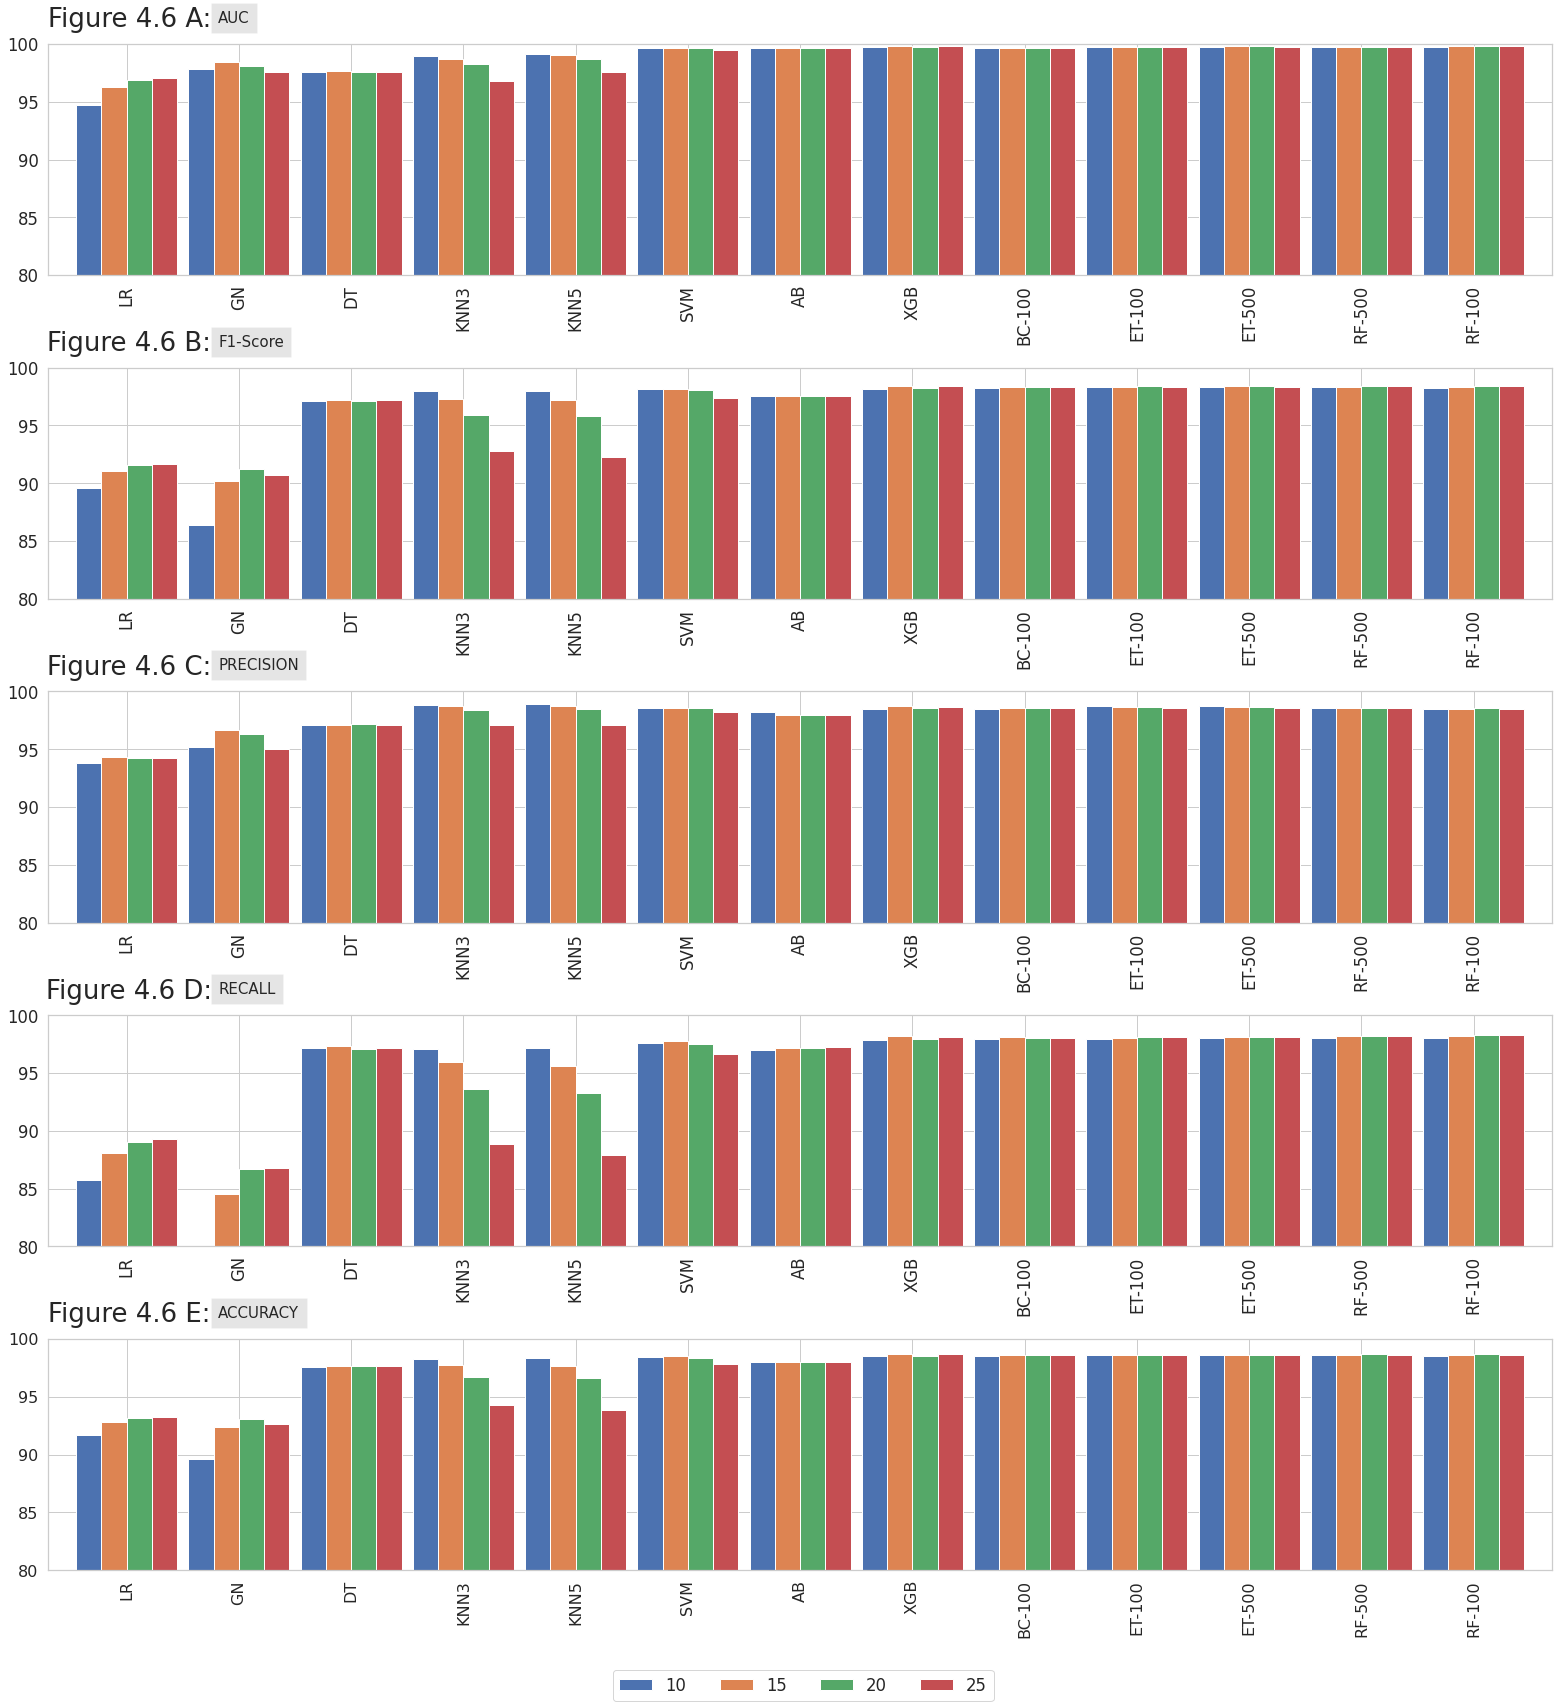

In [ ]:
algorithm_dic={
    'AUC':'AUC',
    'F1':'F1-Score',
    'PRECISION':'PRECISION',
    'RECALL':'RECALL',
    'ACCURACY':'ACCURACY',
}

fig, axs = plt.subplots(ncols=1,nrows=5, figsize=(22,24))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

y_label=["A","B","C","D","E"]



for index,selection_type in enumerate(["AUC","F1","PRECISION","RECALL","ACCURACY"]):


  df=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df.rename(index={'lr':'LR','gn':'GN','dt':'DT','knn3':'KNN3','knn5':'KNN5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)


  df.rename(columns={
        '{}_10'.format(selection_type):'10',
        '{}_15'.format(selection_type):'15',
        '{}_20'.format(selection_type):'20',
        '{}_25'.format(selection_type):'25',
    }, inplace=True)



  df = df[['10', '15', '20', '25']]
  
  sns.set(style="whitegrid",font_scale = 1.5)

  ax=df.plot(kind="bar",ax=axs[index],width=0.9)


  ax.set_ylim([80, 100])
  ax.set_xlabel('')
  ax.set_xlabel(f'Figure 4.6 {y_label[index]}:',rotation=0,labelpad=0,fontsize=26)
  ax.xaxis.set_label_coords(0.054,1.16)


  if index!=4:
    ax.get_legend().remove()
  else:
    ax.legend(loc="lower left", ncol=4,bbox_to_anchor=(0.37, -0.6))


 

  ax.set_title("{}".format(
      algorithm_dic[selection_type]), 
      pad=0.5,
      y=1.11,
      x=0.113,
      fontsize=15, 
      loc='left',
      va="center",
      bbox=dict(facecolor='gray',alpha=0.2,boxstyle='square,pad=0.5')
  )


  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)



fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

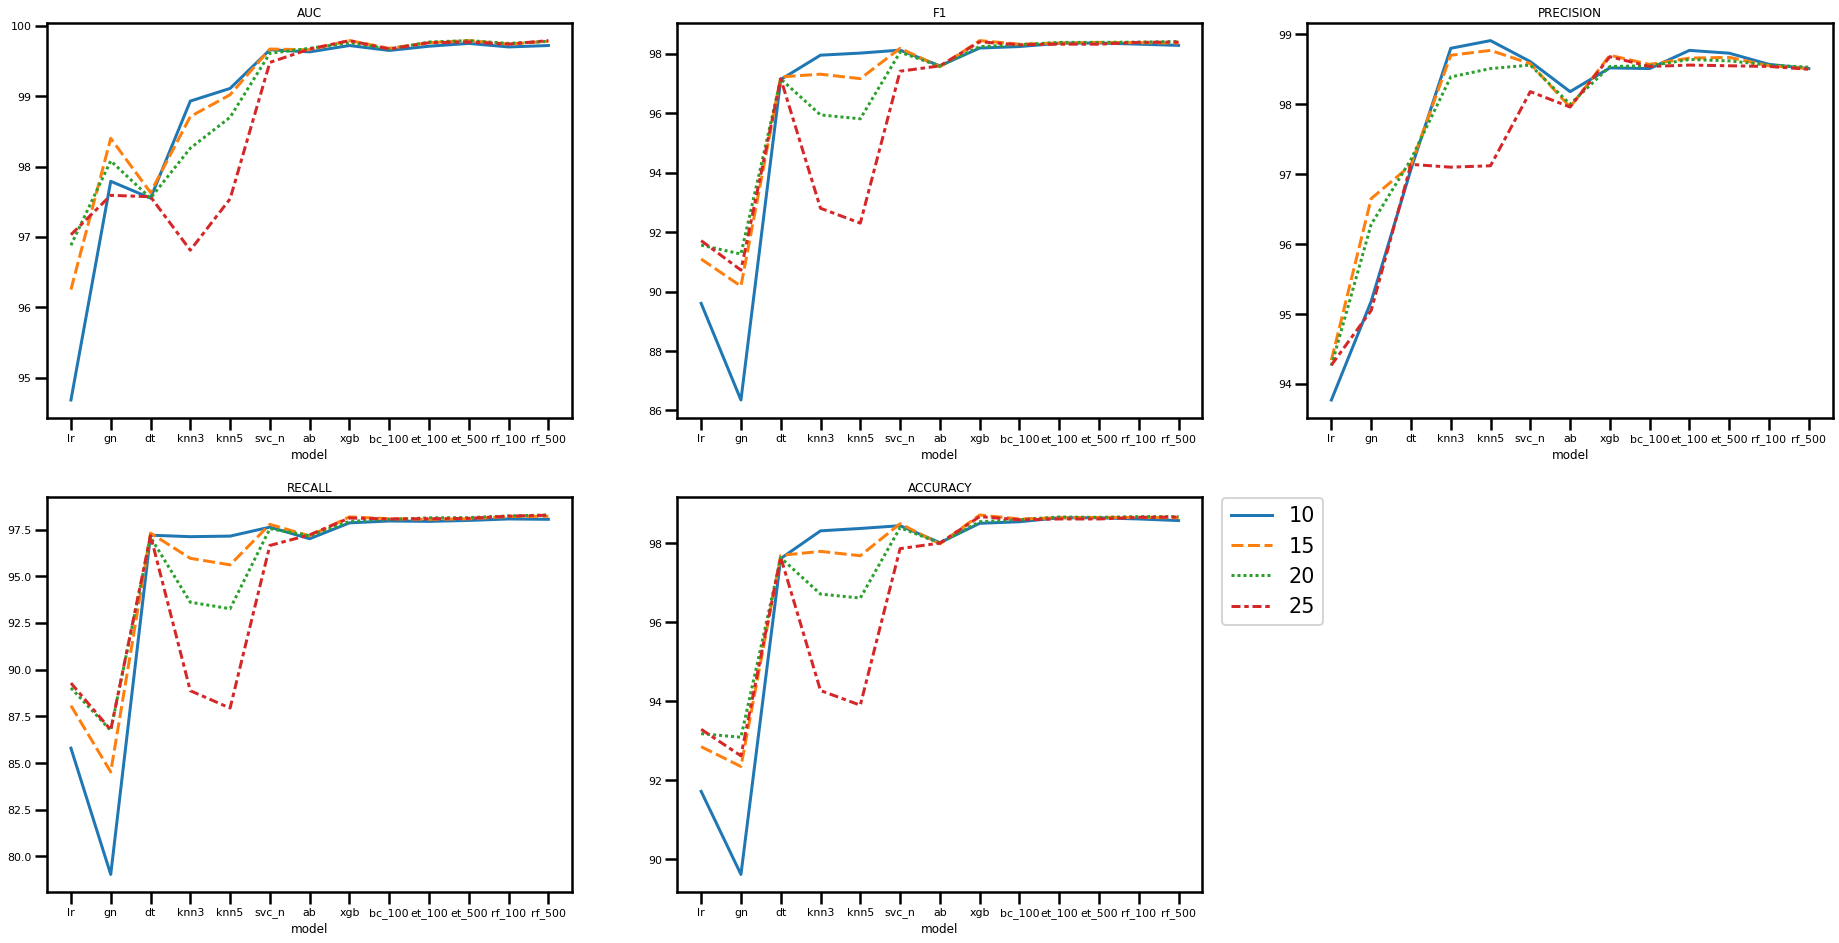

In [ ]:
algorithm_dic={
  'AUC':'AUC',
  'F1':'F1',
  'PRECISION':'PRECISION',
  'RECALL':'RECALL',
  'ACCURACY':'ACCURACY',
}

fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(32,16))

for index_row,selection_list in enumerate([["AUC","F1","PRECISION"],["RECALL","ACCURACY"]]):

  for index_col,selection_type in enumerate(selection_list):


    df_fc=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()

    df_fc.set_index('model',inplace=True)
    df_fc=df_fc.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])


    df_fc.rename(columns={
        '{}_10'.format(selection_type):'10',
        '{}_15'.format(selection_type):'15',
        '{}_20'.format(selection_type):'20',
        '{}_25'.format(selection_type):'25',
    }, inplace=True)

    df_fc = df_fc[['10', '15', '20', '25']]

    ax=sns.lineplot(
        data=df_fc,
        markers=False, 
        dashes=True,
        ax=axs[index_row][index_col]
    )
    if index_row!=1 or index_col!=1:
      ax.get_legend().remove()
    else:
      ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.025),fontsize='xx-large')

    ax.set_title("{}".format(algorithm_dic[selection_type]))

    
    ax.set_xticks(range(len(df_fc)))
    ax.set_xticklabels(df_fc.index)
    sns.set_context("poster",font_scale=0.5)

axs[1,2].set_axis_off()
plt.show()

In [ ]:
test1=data.loc[(data["featureNumber"]==10) & (data["Normalizer"]=='normal') & (data["selectionMethod"]!="sf_XGBClassifier"),["modelName","fit_time","score_time"]]
test1=test1.groupby("modelName").agg(fitMean=("fit_time","mean"),scoreMean=("score_time","mean"))

test1["fullTime"]=test1["fitMean"]+test1["scoreMean"]
test1.sort_values("fitMean",inplace=True)

test1.drop(columns=["fitMean","scoreMean"],inplace=True)

test1["fullTime"]=test1["fullTime"].apply(lambda x: round(x,1))
test1

,fullTime
modelName,
ab,236.6
gn,413.6
dt,415.0
lr,417.7
xgb,432.0
et_100,448.5
knn3,541.1
knn5,550.3
rf_100,544.4


In [ ]:
normalizer_mask=(data["Normalizer"]=='normal') & (data["selectionMethod"]=="rfe_DecisionTree")

test1=data.loc[(data["featureNumber"]==25) & (data["Normalizer"]=='normal') & (data["selectionMethod"]=="rfe_DecisionTree"),["modelName","fit_time","score_time"]]
test1=test1.groupby("modelName").agg(fitMean=("fit_time","mean"),scoreMean=("score_time","mean"))

test1["fullTime"]=test1["fitMean"]+test1["scoreMean"]
test1.sort_values("fitMean",inplace=True)

# test1.drop(columns=["fitMean","scoreMean"],inplace=True)

test1["fullTime"]=test1["fullTime"].apply(lambda x: round(x,1))
test1

,fitMean,scoreMean,fullTime
modelName,,,
et_500,1112.258238,29.936166,1142.2
svc_n,1324.551790,165.042897,1489.6
lr,1388.921962,2.086521,1391.0
knn3,1401.927138,26.677003,1428.6
gn,1407.860003,2.315869,1410.2
dt,1413.509458,2.211218,1415.7
knn5,1447.057267,40.060233,1487.1
xgb,1452.978340,2.413735,1455.4
ab,1456.697884,4.136184,1460.8
